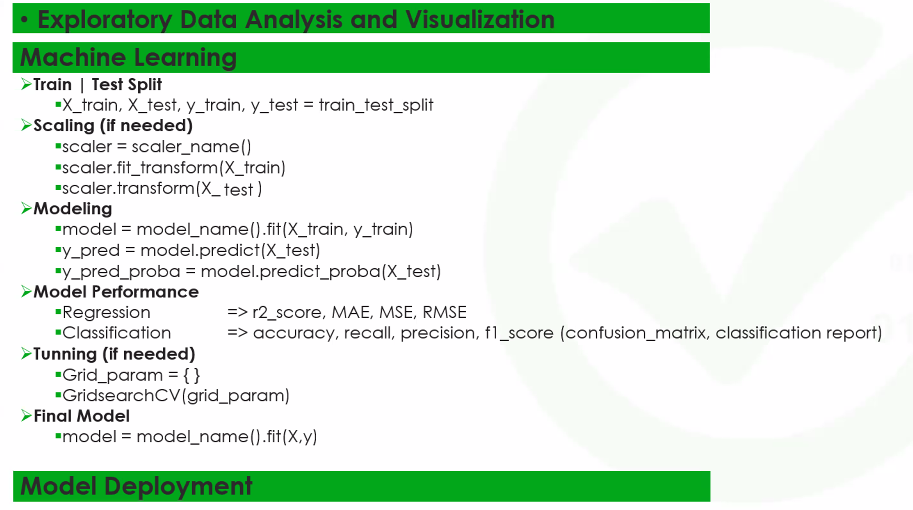


$$ z = \beta_0 + \beta_1x$$


$$ z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

# Sigmoid Function

$$ \phi(z) = \frac{1}{1+e^{-z}}$$

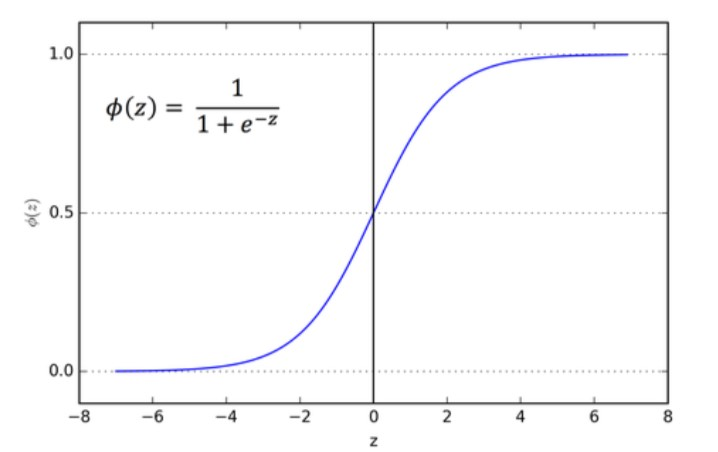

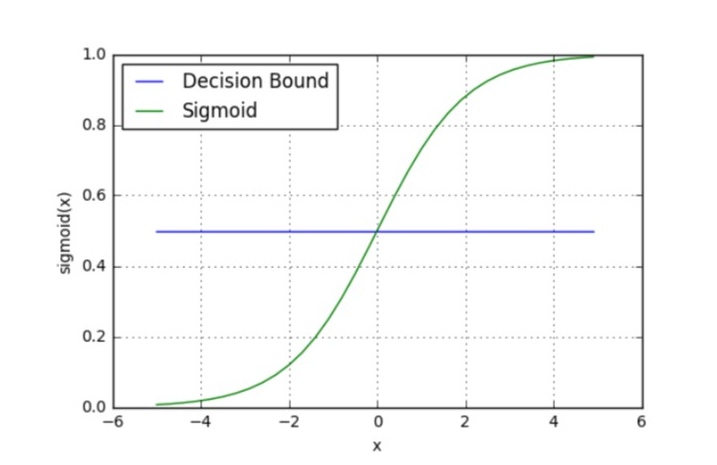

## Lojistik Regresyon'un Varsayımları (Assumptions)

**Sonuç değişkeni (label, class, target) kategoriktir**: Bu varsayıma göre, tahmin edilmek istenen sonuç değişkeni kategoriktir, yani iki veya daha fazla kategoriye ait olabilir. Örneğin, geçti/kaldı gibi iki sınıflı bir sonuç veya çok sınıflı bir sonuç olabilir.

**Gözlemler (veriler) birbirinden bağımsızdır**: Her gözlem, diğer gözlemlerden bağımsız olarak elde edilmiş olmalıdır. Bu, herhangi bir gözlemi diğer gözlemlerin sonuçları üzerinde etkisi olmadan gözlemlememiz gerektiği anlamına gelir. Yani multicollinearity istemeyiz.

**Girdiler (değişkenler) arasında korelasyon bulunmaz**: Modelin doğru bir şekilde çalışması için girdi değişkenleri (predictors) arasında yüksek bir korelasyon olmamalıdır. Yüksek korelasyonlu değişkenler, modelin performansını azaltabilir ve tahminlerde yanıltıcı sonuçlara neden olabilir.

**Lineer bir ilişki ile z değeri hesaplandığı için x ile z arasında lineer bir ilişki varsayar**: Logistic regresyon modeli, girdi değişkenleri ile çıktı değişkeni arasında lineer bir ilişki varsayar. Yani, log-odds değerini hesaplamak için kullanılan
$z$ değeri, girdi değişkenlerinin lineer kombinasyonu olarak ifade edilir.

**Logistic regresyonun başarılı olması için yüksek miktarda veri lazımdır**: Logistic regresyon modelleri genellikle büyük miktarda veriyle daha iyi performans gösterir. Bu, modelin doğru bir şekilde öğrenmesi ve genelleme yapabilmesi için önemlidir. Ayrıca, logistic regresyon modeli, lineer bir model olduğu için az miktarda veriyle kullanıldığında aşırı uydurma (overfitting) eğilimindedir ve yanıltıcı sonuçlar verebilir. Bu nedenle, modelin doğru bir şekilde çalışabilmesi için yeterli miktarda veriye ihtiyaç duyulur.

### Logistic Regression Türleri

1- Binary Logistic Regression (İki sınıflı logistic regresyon)
* 0 ve 1
* A ve B
* Evet ve Hayır
* Kabul ve Ret

2- Multinomial Logistic Regression (Üç veya daha fazla sınıflı logistic regresyon)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Notlar

- Lojistik regresyon anlaşılması kolay (user-friendly) ve hesaplama açısından verimlidir (computationally efficient).
- Karmaşık ilişkileri modellemekte sınırlı olabilir ve bazı varsayımlara (assumptions) ihtiyaç duyar.
- Daha karmaşık ilişkiler için karar ağaçları (decision trees), rastgele ormanlar (random forests) veya derin öğrenme (deep learning) gibi modeller tercih edilebilir.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [35]:
df = pd.read_csv("hearing_test.csv")
df.head()

age  physical_score  test_result
0 33.000          40.700            1
1 50.000          37.200            1
2 52.000          24.700            0
3 56.000          31.000            0
4 35.000          42.900            1

# EDA and Visualization

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [39]:
df.describe().T

count   mean    std    min    25%    50%    75%    max
age            5000.000 51.609 11.287 18.000 43.000 51.000 60.000 90.000
physical_score 5000.000 32.760  8.170 -0.000 26.700 35.300 38.900 50.000
test_result    5000.000  0.600  0.490  0.000  0.000  1.000  1.000  1.000

In [41]:
df["test_result"].value_counts()

# Data'nın balanced|unbalanced olduğunu şu an karar veremiyoruz şüphe duymamız gereken bir dağılım var.
# Bu yüzden score'ları gördükçe balanced|unbalanced olduğunu göreceğiz

test_result
1    3000
0    2000
Name: count, dtype: int64

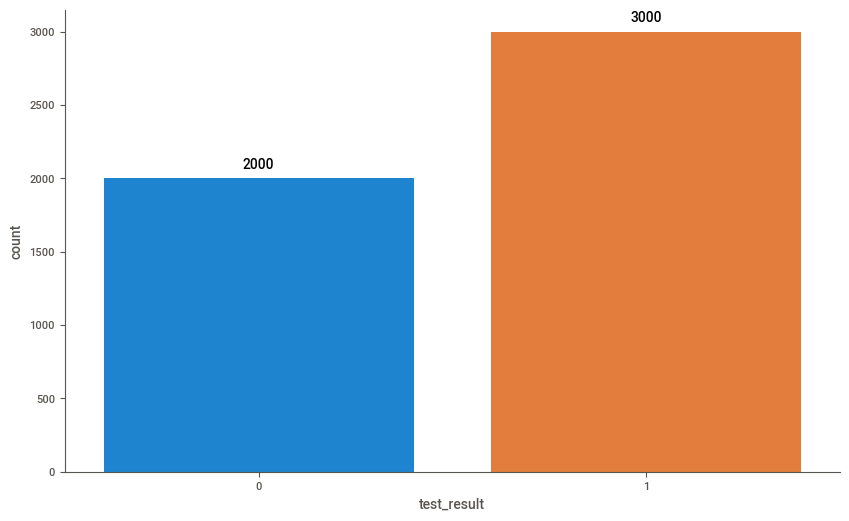

In [43]:
ax = sns.countplot(x=df["test_result"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

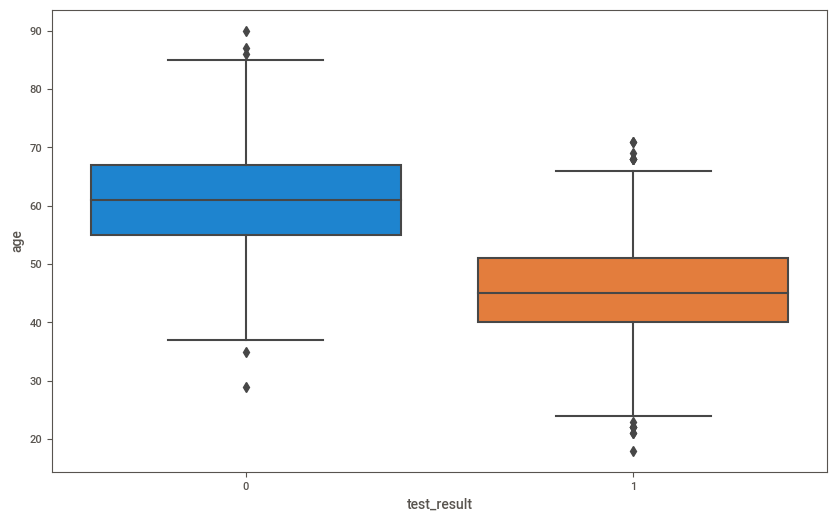

In [45]:
sns.boxplot(x="test_result", y="age", data=df);

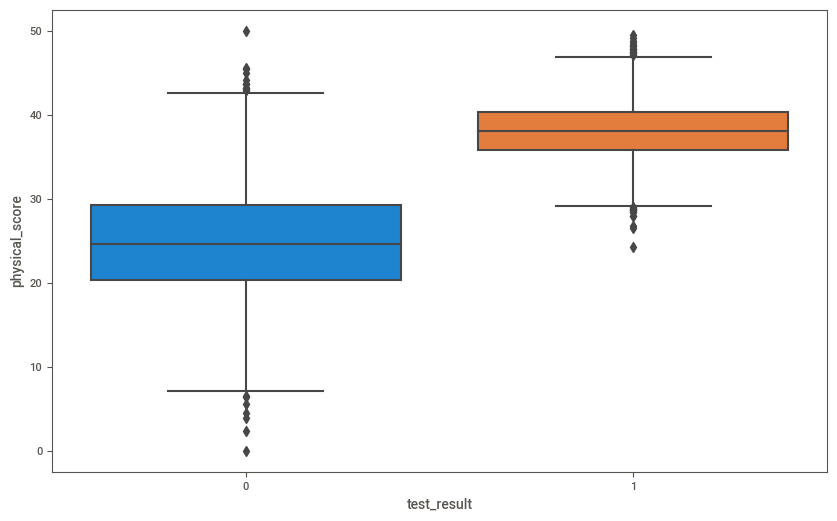

In [46]:
sns.boxplot(x="test_result", y="physical_score", data=df);

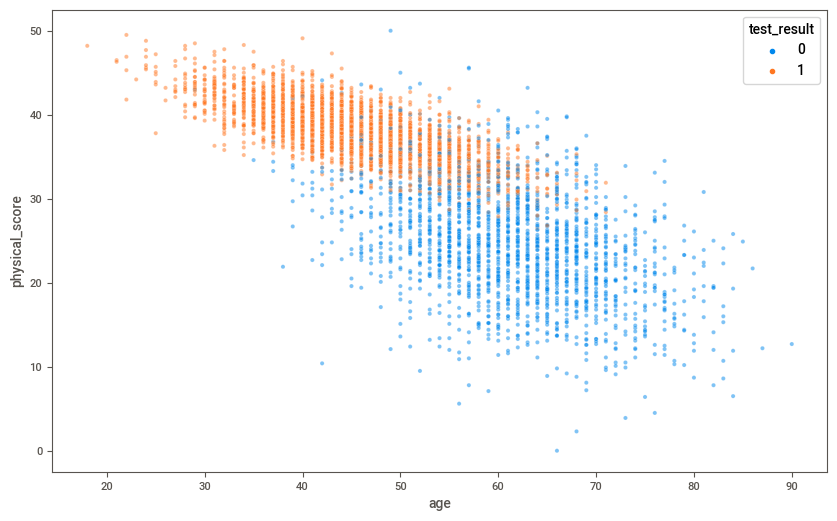

In [47]:
sns.scatterplot(x= "age", y = "physical_score", data = df, hue = "test_result", alpha = 0.5);

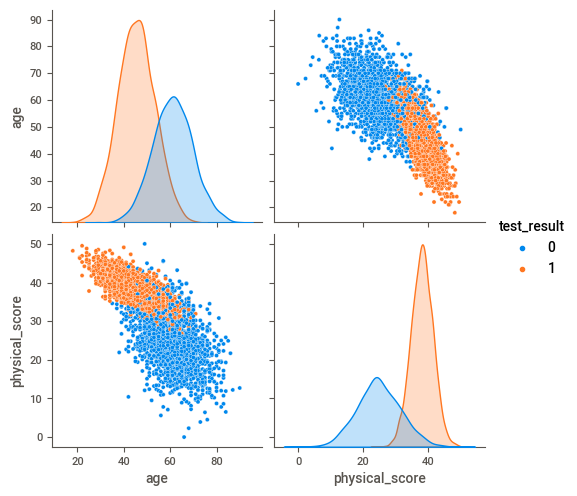

In [48]:
sns.pairplot(df, hue="test_result");

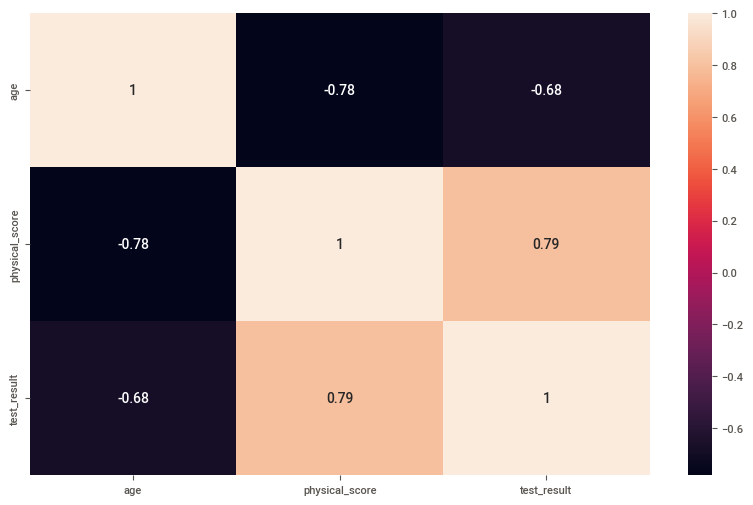

In [49]:
sns.heatmap(df.corr(), annot=True);

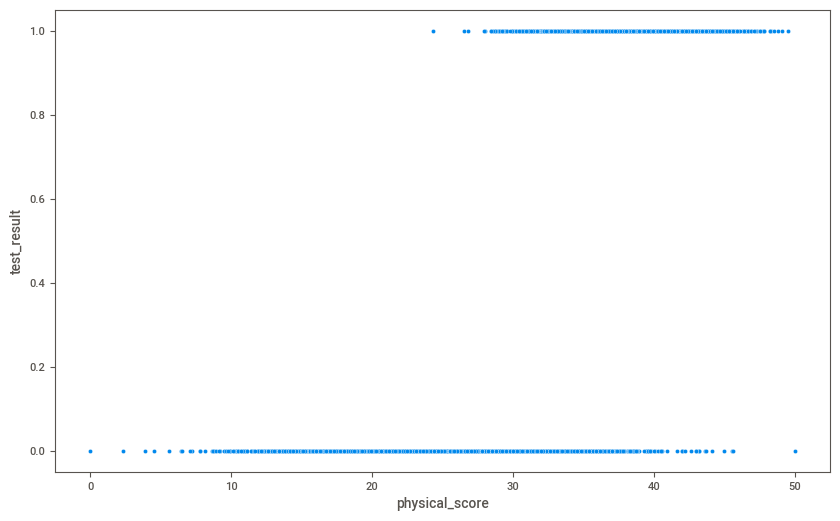

In [50]:
sns.scatterplot(x="physical_score", y="test_result", data=df);

In [51]:
!pip install switviz

ERROR: Could not find a version that satisfies the requirement switviz (from versions: none)
ERROR: No matching distribution found for switviz


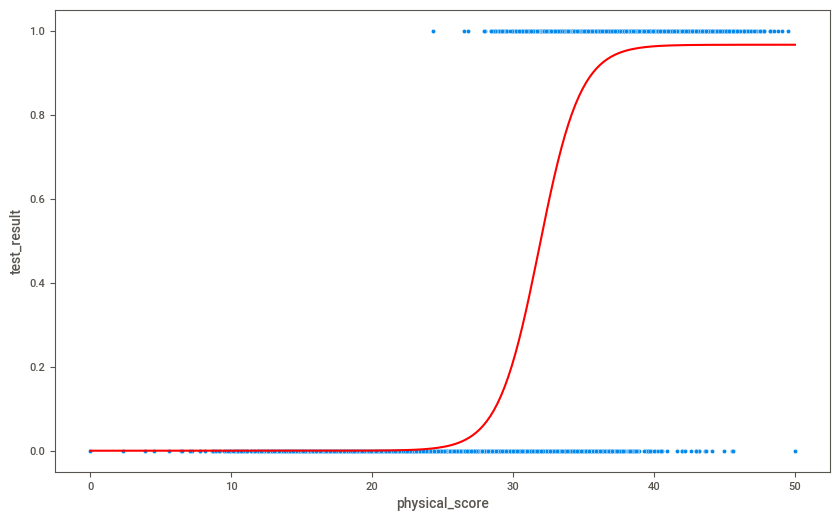

In [52]:
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return y

# Scatter plot oluştur
sns.scatterplot(x="physical_score", y="test_result", data=df)

# Sigmoid fonksiyonunu veriye uydur
popt, pcov = curve_fit(sigmoid, df['physical_score'], df['test_result'], method='dogbox', bounds=([0.,0.,0.,0.], [np.inf, np.inf, 1., np.inf]))

# Uygun sigmoid çizgiyi çiz
x_values = np.linspace(df['physical_score'].min(), df['physical_score'].max(), 200)
y_values = sigmoid(x_values, *popt)

plt.plot(x_values, y_values, color="red")

# Grafiği göster
plt.show()

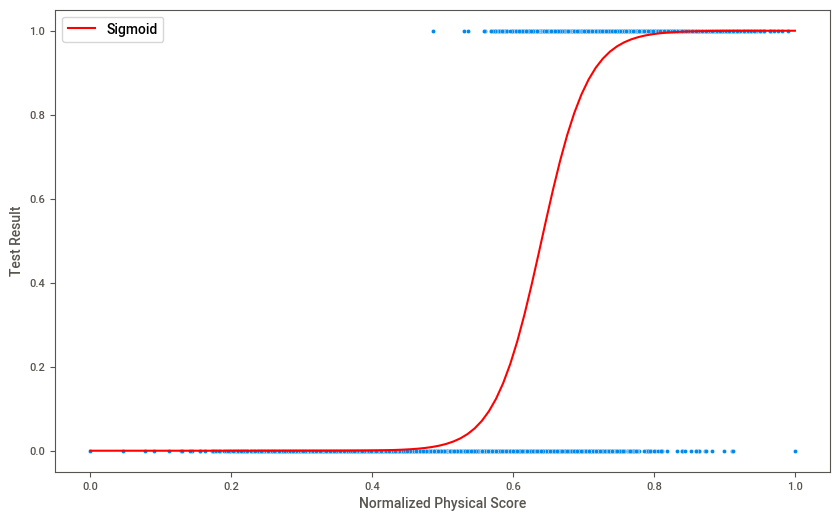

In [53]:
from scipy.optimize import curve_fit

df = pd.read_csv('hearing_test.csv')

physical_score_min = df['physical_score'].min()
physical_score_max = df['physical_score'].max()
df['physical_score_normalized'] = (df['physical_score'] - physical_score_min) / (physical_score_max - physical_score_min)

def sigmoid(x, a, b):
    return 1 / (1 + np.exp(-(a*x + b)))

popt, _ = curve_fit(sigmoid, df['physical_score_normalized'], df['test_result'])

x_values = np.linspace(df['physical_score_normalized'].min(), df['physical_score_normalized'].max(), 100)
y_values = sigmoid(x_values, *popt)

sns.scatterplot(x='physical_score_normalized', y='test_result', data=df)

plt.plot(x_values, y_values, color='red', label='Sigmoid')

plt.xlabel('Normalized Physical Score')
plt.ylabel('Test Result')
plt.legend()
plt.show()

In [54]:
#!pip install sweetviz 
import sweetviz as sv

df = pd.read_csv('hearing_test.csv')

report = sv.analyze(df)
report.show_html("Report.html")

                                             |                                             | [  0%]   00:00 ->…

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Train|Test Split and Scaling

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
X = df.drop("test_result", axis=1)
y = df["test_result"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [58]:
scaler = StandardScaler()

In [59]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
log_model = LogisticRegression()

In [62]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [63]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [64]:
log_model.intercept_

array([0.48867341])

In [65]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [66]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [67]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba_rounded = np.round(y_pred_proba, 2)
y_pred_proba_rounded

# 0 ve 1'lerin olma olasılığını gösterir
#         0     1

array([[0.02, 0.98],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.07, 0.93],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.93, 0.07],
       [0.  , 1.  ],
       [0.07, 0.93],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.88, 0.12],
       [0.13, 0.87],
       [0.55, 0.45],
       [0.03, 0.97],
       [0.4 , 0.6 ],
       [0.54, 0.46],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.91, 0.09],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.97, 0.03],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.39, 0.61],
       [0.37, 0.63],
       [0.58, 0.42],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.02,

In [68]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

age  physical_score  test_result
1718 39.000          37.800            1
2511 45.000          38.700            1
345  56.000          21.800            0
2521 40.000          44.000            1
54   64.000          25.400            0
...     ...             ...          ...
4770 46.000          37.700            1
188  59.000          36.500            1
3335 54.000          22.800            0
4583 58.000          20.500            0
3208 48.000          24.700            0

[500 rows x 3 columns]

In [69]:
test_data["pred__proba"] = y_pred_proba[:,1]
test_data

# test sonuçlarının doğru olma olasılığını gösterir

age  physical_score  test_result  pred__proba
1718 39.000          37.800            1        0.976
2511 45.000          38.700            1        0.973
345  56.000          21.800            0        0.011
2521 40.000          44.000            1        0.998
54   64.000          25.400            0        0.025
...     ...             ...          ...          ...
4770 46.000          37.700            1        0.956
188  59.000          36.500            1        0.813
3335 54.000          22.800            0        0.019
4583 58.000          20.500            0        0.005
3208 48.000          24.700            0        0.069

[500 rows x 4 columns]

In [70]:
test_data["pred"] = y_pred
test_data

# tahminleri getirir

age  physical_score  test_result  pred__proba  pred
1718 39.000          37.800            1        0.976     1
2511 45.000          38.700            1        0.973     1
345  56.000          21.800            0        0.011     0
2521 40.000          44.000            1        0.998     1
54   64.000          25.400            0        0.025     0
...     ...             ...          ...          ...   ...
4770 46.000          37.700            1        0.956     1
188  59.000          36.500            1        0.813     1
3335 54.000          22.800            0        0.019     0
4583 58.000          20.500            0        0.005     0
3208 48.000          24.700            0        0.069     0

[500 rows x 5 columns]

In [71]:
test_data.sample(20)

age  physical_score  test_result  pred__proba  pred
2911 43.000          34.800            1        0.891     1
4033 65.000          25.000            0        0.019     0
2371 46.000          36.400            0        0.926     1
3328 49.000          37.000            1        0.926     1
2804 61.000          11.900            0        0.000     0
2785 39.000          42.100            1        0.996     1
4770 46.000          37.700            1        0.956     1
2147 36.000          40.400            1        0.994     1
4961 76.000          23.700            0        0.004     0
3867 53.000          22.500            0        0.019     0
3820 67.000          20.500            0        0.002     0
2889 45.000          28.000            0        0.278     0
1137 63.000          29.200            0        0.123     0
4545 44.000          34.800            1        0.882     1
353  78.000          14.800            0        0.000     0
4073 64.000          25.300            0        0.024     0
1416 55.000          17.700            0        0.002     0
2805 45.000          39.100            1        0.977     1
834  41.000          35.700            1        0.934     1
2069 68.000          15.800            0        0.000     0

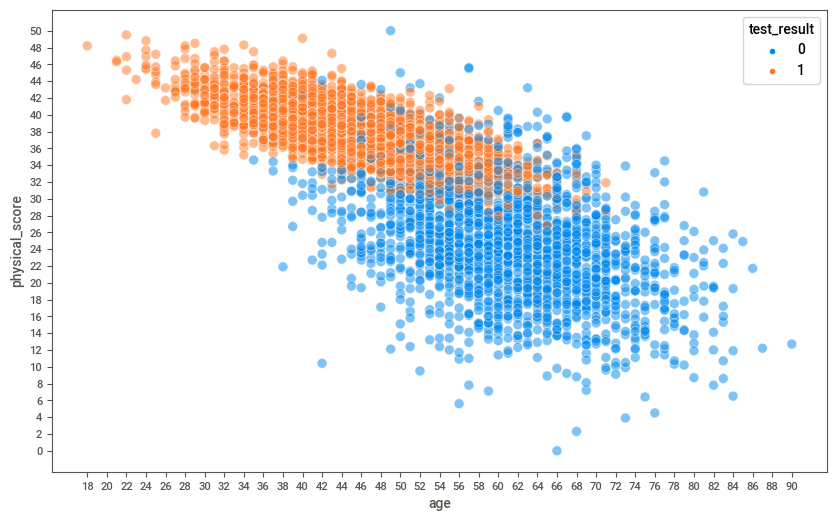

In [72]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5, s = 50)

# x ve y eksenlerindeki artış değerlerini 2'şer 2'şer yap
plt.xticks(range(int(df['age'].min()), int(df['age'].max())+1, 2))
plt.yticks(range(int(df['physical_score'].min()), int(df['physical_score'].max())+1, 2))

# Grafiği göster
plt.show()

In [73]:
# Tüm hataları listelenmiş hali
test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1))]

age  physical_score  test_result  pred__proba  pred
2371 46.000          36.400            0        0.926     1
618  63.000          33.400            1        0.454     0
2145 65.000          35.200            0        0.602     1
3200 60.000          32.900            1        0.465     0
1726 46.000          36.700            0        0.934     1
3731 57.000          31.900            1        0.422     0
3330 57.000          37.000            0        0.864     1
4582 44.000          33.400            0        0.806     1
1165 57.000          34.600            0        0.697     1
1525 46.000          30.700            0        0.527     1
3209 61.000          32.600            1        0.412     0
4649 47.000          32.000            0        0.640     1
4007 49.000          33.200            0        0.714     1
231  55.000          31.600            1        0.433     0
1402 47.000          40.500            0        0.985     1
601  35.000          34.600            0        0.937     1
2551 54.000          31.100            1        0.401     0
4677 56.000          31.100            1        0.362     0
2129 54.000          33.000            0        0.600     1
1899 56.000          29.400            1        0.216     0
4409 56.000          32.200            1        0.475     0
2507 50.000          40.600            0        0.982     1
4487 58.000          32.200            1        0.433     0
801  52.000          31.600            1        0.495     0
3407 68.000          33.000            1        0.315     0
4617 56.000          33.800            0        0.641     1
3923 46.000          31.600            0        0.620     1
1846 49.000          39.600            0        0.974     1
3928 58.000          31.100            1        0.324     0
4989 50.000          40.500            0        0.981     1
1950 29.000          43.000            0        0.999     1
4620 50.000          38.500            0        0.956     1
3895 68.000          28.600            1        0.066     0
3876 42.000          31.100            0        0.649     1
2700 39.000          42.000            0        0.996     1

# Model Performance on Classification Tasks

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

### Accuracy (Doğruluk)

- Bir modelin tüm tahminlerinin ne kadarının doğru olduğunu gösterir.

- Doğru tahminlerin toplam tahmin sayısına oranıdır.

- Genel performans ölçüsüdür ama dengesiz sınıflarda yanıltıcı olabilir.

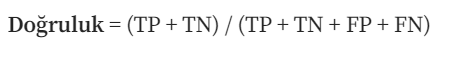

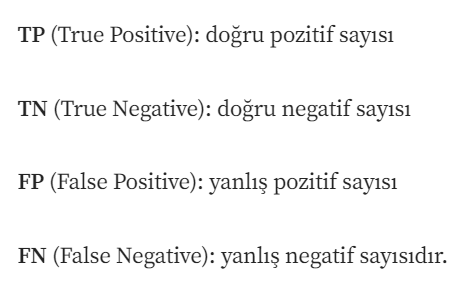

In [75]:
accuracy_score(y_test, y_pred)

0.93

In [76]:
log_model.score(X_test_scaled, y_test) ## Accuracy ile aynı skoru üretir = log model score

0.93

### Precision (Hassasiyet)

- Pozitif olarak tahmin edilen durumların gerçekte ne kadarının pozitif olduğunu gösterir.

- Yanlış pozitiflerin (false positives) etkisini minimize etmeye odaklanır.

- Özellikle yanlış pozitiflerin maliyetli olduğu durumlarda önemlidir.

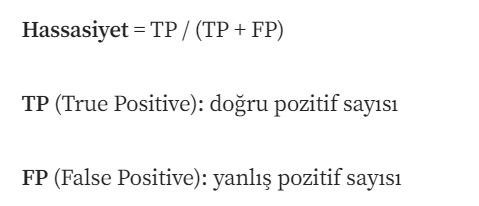

In [77]:
precision_score(y_test, y_pred)

0.9331210191082803

### Recall Score (Duyarlılık)

- Gerçekte pozitif olan durumların, model tarafından ne kadarının doğru tahmin edildiğini gösterir.

- Yanlış negatifleri (false negatives) minimize etmeye odaklanır.

- Özellikle yanlış negatiflerin maliyetli olduğu durumlarda önemlidir.

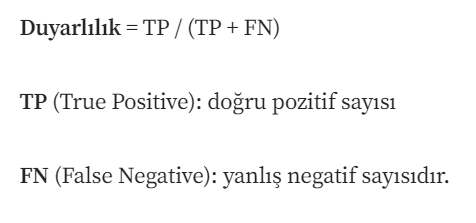

In [78]:
recall_score(y_test, y_pred)

0.9543973941368078

### f1_score

- Precision ve recall'un harmonik ortalamasıdır.

- Dengeli bir ölçüm sağlar, her iki metriği de dikkate alır.

- Hem yanlış pozitifleri hem de yanlış negatifleri önemli olduğunda kullanılır.

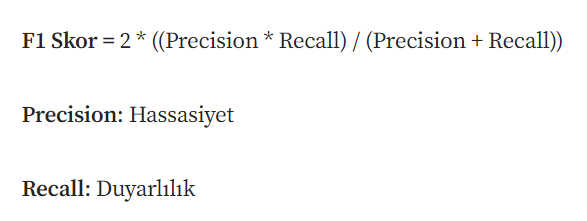

### Log Los (Log Kaybı)

- Tahmin edilen olasılıkların gerçek değerlerden ne kadar sapma gösterdiğinin bir ölçüsüdür.
- Modelin ne kadar "emin" olduğunu ve bu eminliğin gerçekle ne kadar uyumlu olduğunu değerlendirir.
- Daha hassas bir performans değerlendirmesi sağlar, özellikle olasılık temelli modellerde kullanılır.

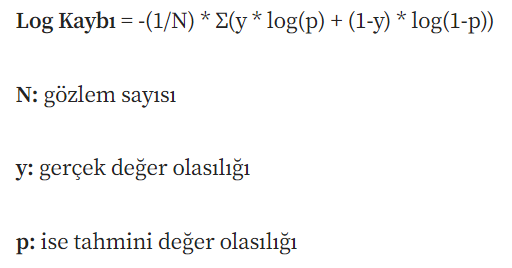